# Task 1: EDA
Overview

We're building a portfolio optimization system for GMF Investments using three key assets:

TSLA: High-growth, high-risk stock

BND: Stable bond ETF for income

SPY: Diversified market exposure

This analysis will help us understand each asset's behavior and prepare data for forecasting models.


# Step1: Import Libraries and Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [7]:

# Load the data
print("Loading data...")
tsla = pd.read_csv(r'C:\Users\Antifragile\Desktop\Time_series_stock_analysis\data\TSLA_data.csv', index_col=0, parse_dates=True)
bnd = pd.read_csv(r'C:\Users\Antifragile\Desktop\Time_series_stock_analysis\data\BND_data.csv', index_col=0, parse_dates=True)
spy = pd.read_csv(r'C:\Users\Antifragile\Desktop\Time_series_stock_analysis\data\SPY_data.csv', index_col=0, parse_dates=True)

assets = {'TSLA': tsla, 'BND': bnd, 'SPY': spy}
print("Data loaded successfully!")

Loading data...
Data loaded successfully!


# Step 2: Data Cleaning and Understanding

Financial data can have missing values, wrong data types, or inconsistencies. Clean data ensures our analysis and models work correctly

In [9]:
print("=== DATA CLEANING AND UNDERSTANDING ===\n")

for ticker, data in assets.items():
    print(f"{ticker} Dataset:")
    print(f"Shape: {data.shape}")
    print(f"Date range: {data.index.min().date()} to {data.index.max().date()}")
    print(f"Data types:\n{data.dtypes}")
    print(f"Missing values:\n{data.isnull().sum()}")
    print("\nBasic Statistics:")
    print(data.describe().round(2))
    print("-" * 60)

=== DATA CLEANING AND UNDERSTANDING ===

TSLA Dataset:
Shape: (2535, 8)
Date range: 2015-07-01 to 2025-07-30
Data types:
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
Ticker           object
dtype: object
Missing values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Ticker          0
dtype: int64

Basic Statistics:
          Open     High      Low    Close        Volume  Dividends  \
count  2535.00  2535.00  2535.00  2535.00  2.535000e+03     2535.0   
mean    132.00   134.96   128.84   131.96  1.141789e+08        0.0   
std     121.03   123.78   118.00   120.91  7.332146e+07        0.0   
min       9.49    10.33     9.40     9.58  1.062000e+07        0.0   
25%      18.90    19.28    18.58    18.97  6.908220e+07        0.0   
50%      94.40    97.67    91.73    94.57  9.537450e+07      

In [6]:
print("\n=== HANDLING MISSING VALUES ===")

for ticker, data in assets.items():
    missing_before = data.isnull().sum().sum()
    
    # Forward fill missing values (common for financial data)
    assets[ticker] = data.fillna(method='ffill').fillna(method='bfill')
    
    missing_after = assets[ticker].isnull().sum().sum()
    print(f"{ticker}: {missing_before} missing values → {missing_after} missing values")



=== HANDLING MISSING VALUES ===
TSLA: 0 missing values → 0 missing values
BND: 0 missing values → 0 missing values
SPY: 0 missing values → 0 missing values


# step3: Returns and Features

In [7]:

print("\n=== CALCULATING RETURNS AND FEATURES ===")

for ticker, data in assets.items():
    # Calculate daily returns
    assets[ticker]['Daily_Return'] = data['Close'].pct_change()
    
    # Calculate rolling volatility (20-day)
    assets[ticker]['Volatility_20'] = data['Close'].pct_change().rolling(20).std()
    
    # Calculate rolling mean (20-day)
    assets[ticker]['MA_20'] = data['Close'].rolling(20).mean()
    
    print(f"{ticker}: Added Daily_Return, Volatility_20, and MA_20 columns")


=== CALCULATING RETURNS AND FEATURES ===
TSLA: Added Daily_Return, Volatility_20, and MA_20 columns
BND: Added Daily_Return, Volatility_20, and MA_20 columns
SPY: Added Daily_Return, Volatility_20, and MA_20 columns


# Step 4:  Price Trends Visualization

Price charts show us the overall direction and volatility patterns, helping us understand each asset's behavior over time


=== VISUALIZING PRICE TRENDS ===


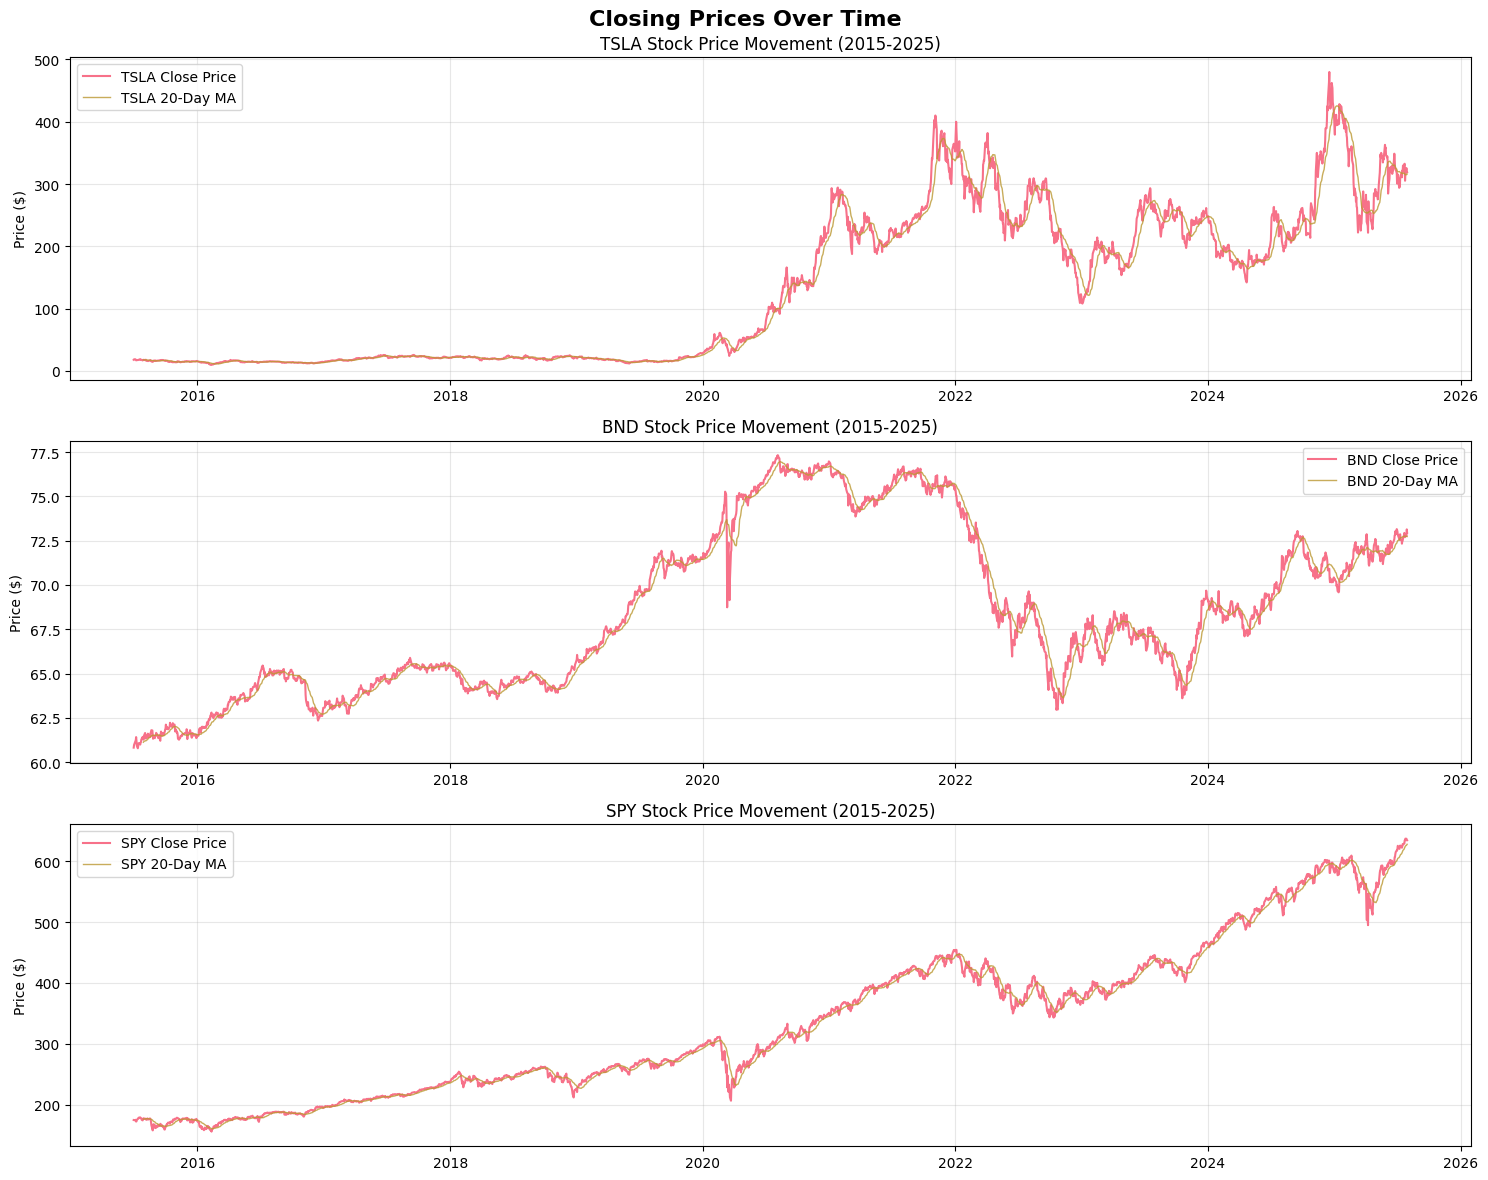

In [8]:
print("\n=== VISUALIZING PRICE TRENDS ===")

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Closing Prices Over Time', fontsize=16, fontweight='bold')

for i, (ticker, data) in enumerate(assets.items()):
    axes[i].plot(data.index, data['Close'], linewidth=1.5, label=f'{ticker} Close Price')
    axes[i].plot(data.index, data['MA_20'], linewidth=1, alpha=0.8, label=f'{ticker} 20-Day MA')
    axes[i].set_title(f'{ticker} Stock Price Movement (2015-2025)')
    axes[i].set_ylabel('Price ($)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 5:Daily Returns Analysis

Daily returns show us how much an asset's value changes each day as a percentage. This is more useful than raw prices for comparing different assets.


=== DAILY RETURNS ANALYSIS ===
TSLA daily returns:
  Mean: 0.1828% (46.07% annualized)
  Std Dev: 3.7285% (59.19% annualized)
  Min: -21.0628%
  Max: 22.6900%
BND daily returns:
  Mean: 0.0078% (1.96% annualized)
  Std Dev: 0.3460% (5.49% annualized)
  Min: -5.4385%
  Max: 4.2201%
SPY daily returns:
  Mean: 0.0575% (14.48% annualized)
  Std Dev: 1.1491% (18.24% annualized)
  Min: -10.9424%
  Max: 10.5019%


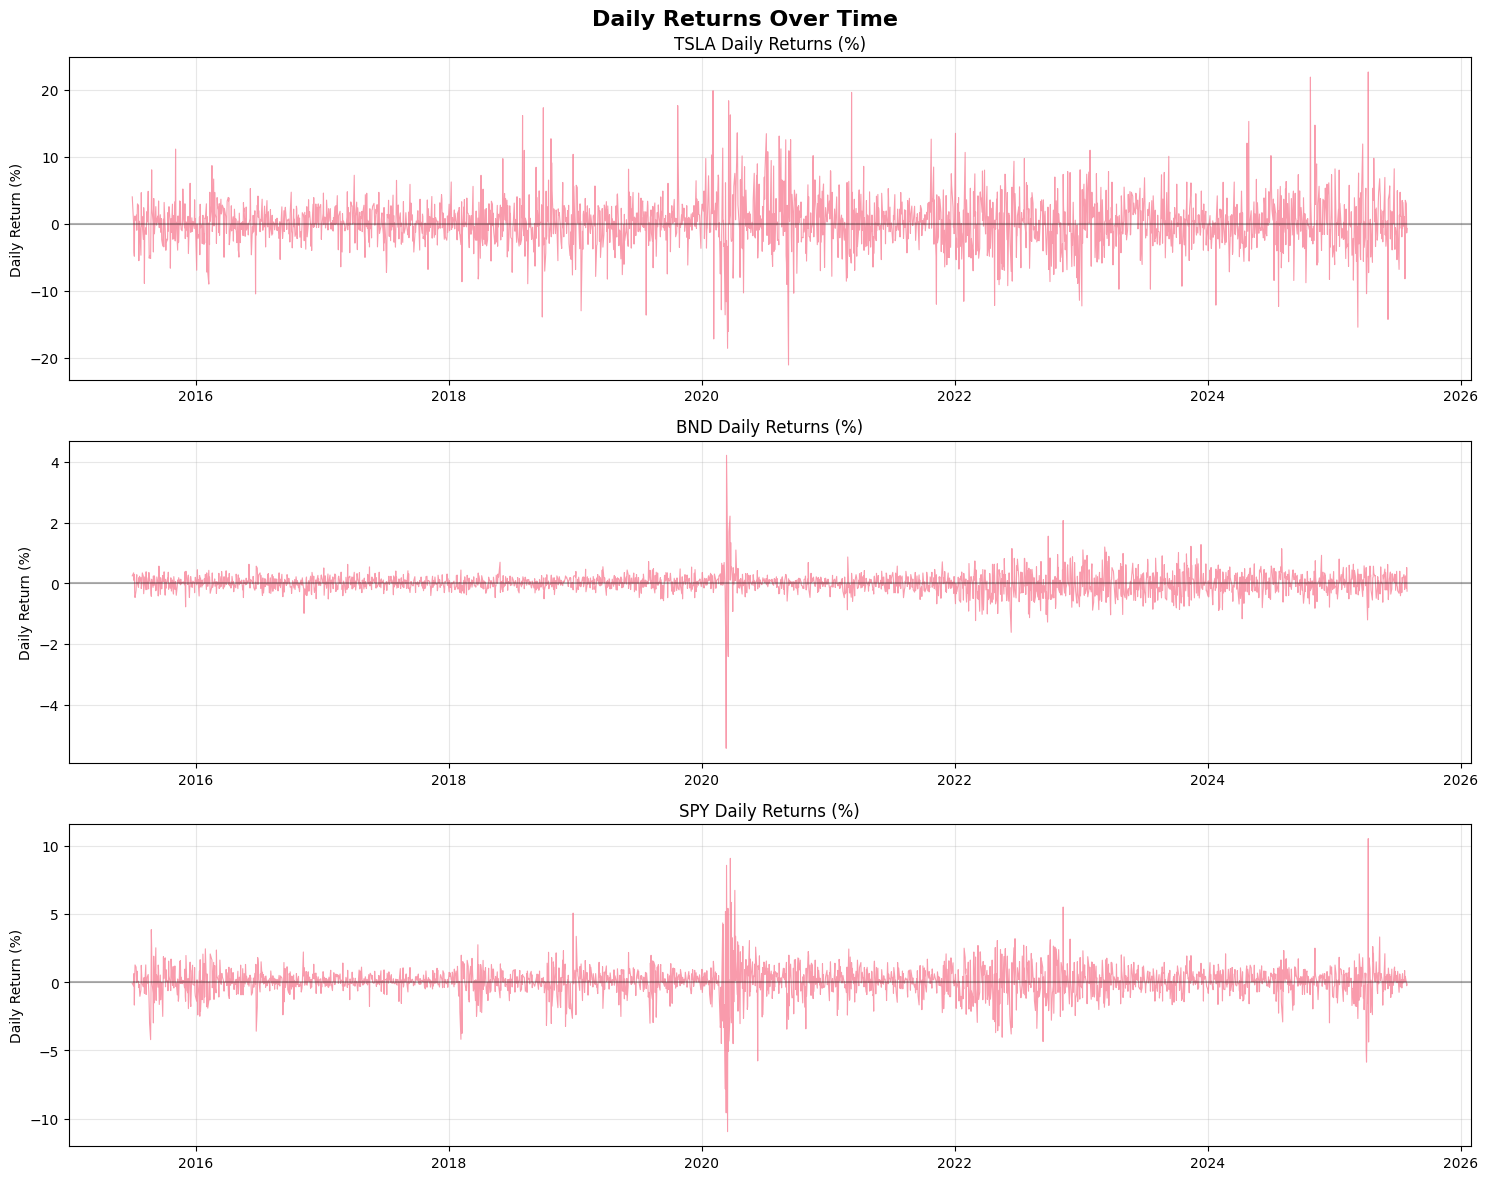

In [18]:
print("\n=== DAILY RETURNS ANALYSIS ===")

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Daily Returns Over Time', fontsize=16, fontweight='bold')

for i, (ticker, data) in enumerate(assets.items()):
    # Calculate daily returns from "Close"
    data['Daily_Return'] = data['Close'].pct_change()
    returns = data['Daily_Return'].dropna()
    
    # Plot daily returns in %
    axes[i].plot(returns.index, returns * 100, linewidth=0.8, alpha=0.7)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[i].set_title(f'{ticker} Daily Returns (%)')
    axes[i].set_ylabel('Daily Return (%)')
    axes[i].grid(True, alpha=0.3)
    
    # Calculate metrics
    mean_daily = returns.mean()
    std_daily = returns.std()
    
    mean_annual = mean_daily * 252
    std_annual = std_daily * (252 ** 0.5)
    
    # Print metrics in %
    print(f"{ticker} daily returns:")
    print(f"  Mean: {mean_daily*100:.4f}% ({mean_annual*100:.2f}% annualized)")
    print(f"  Std Dev: {std_daily*100:.4f}% ({std_annual*100:.2f}% annualized)")
    print(f"  Min: {returns.min()*100:.4f}%")
    print(f"  Max: {returns.max()*100:.4f}%")

plt.tight_layout()
plt.show()



# step5:Volatility Analysis

Volatility tells us how much an asset's price fluctuates. Higher volatility means higher risk but potentially higher returns. 


=== VOLATILITY ANALYSIS ===
TSLA Volatility Stats:
  Mean: 3.439%
  Current: 3.360%
BND Volatility Stats:
  Mean: 0.287%
  Current: 0.257%
SPY Volatility Stats:
  Mean: 0.959%
  Current: 0.418%


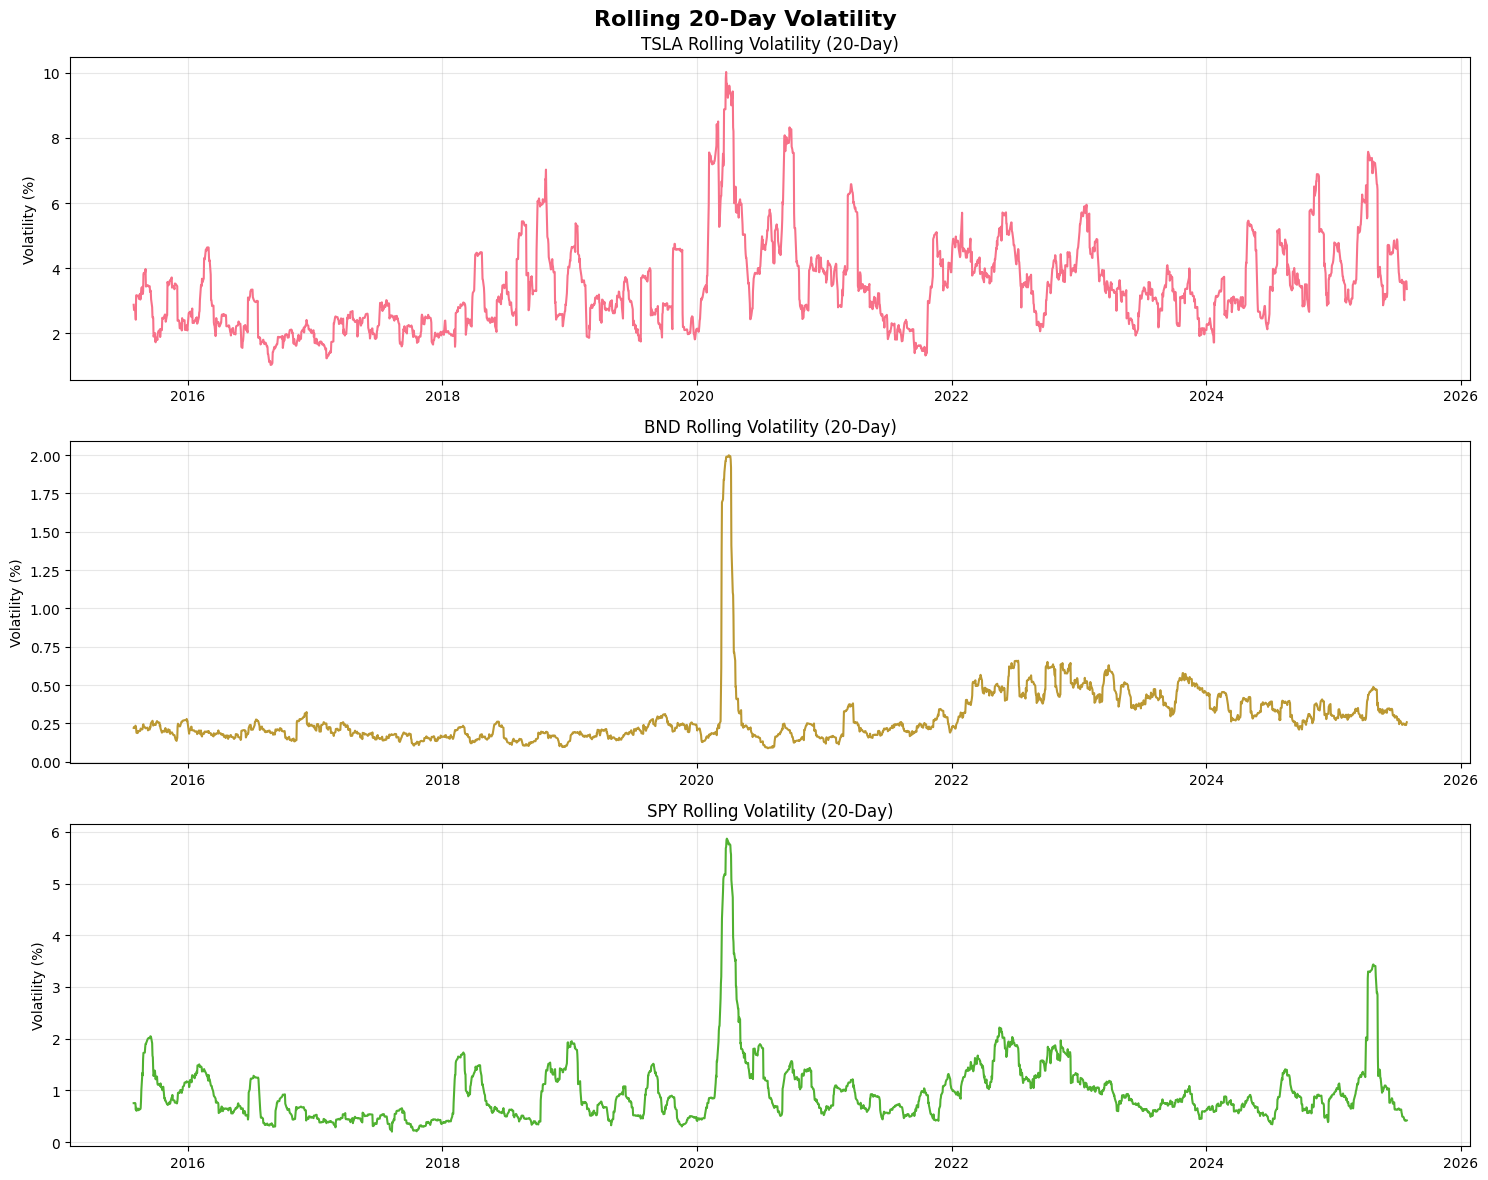

In [10]:

print("\n=== VOLATILITY ANALYSIS ===")

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Rolling 20-Day Volatility', fontsize=16, fontweight='bold')

for i, (ticker, data) in enumerate(assets.items()):
    vol = data['Volatility_20'].dropna()
    
    axes[i].plot(vol.index, vol * 100, linewidth=1.5, color=f'C{i}')
    axes[i].set_title(f'{ticker} Rolling Volatility (20-Day)')
    axes[i].set_ylabel('Volatility (%)')
    axes[i].grid(True, alpha=0.3)
    
    print(f"{ticker} Volatility Stats:")
    print(f"  Mean: {vol.mean()*100:.3f}%")
    print(f"  Current: {vol.iloc[-1]*100:.3f}%")

plt.tight_layout()
plt.show()

# step6:Return Distribution Analysis: 

Identify if returns follow normal distribution


=== RETURN DISTRIBUTION ANALYSIS ===
TSLA Normality Test:
  Test Statistic: 288.5253
  P-value: 0.000000
  Normal Distribution: No
BND Normality Test:
  Test Statistic: 1061.5189
  P-value: 0.000000
  Normal Distribution: No
SPY Normality Test:
  Test Statistic: 576.0117
  P-value: 0.000000
  Normal Distribution: No


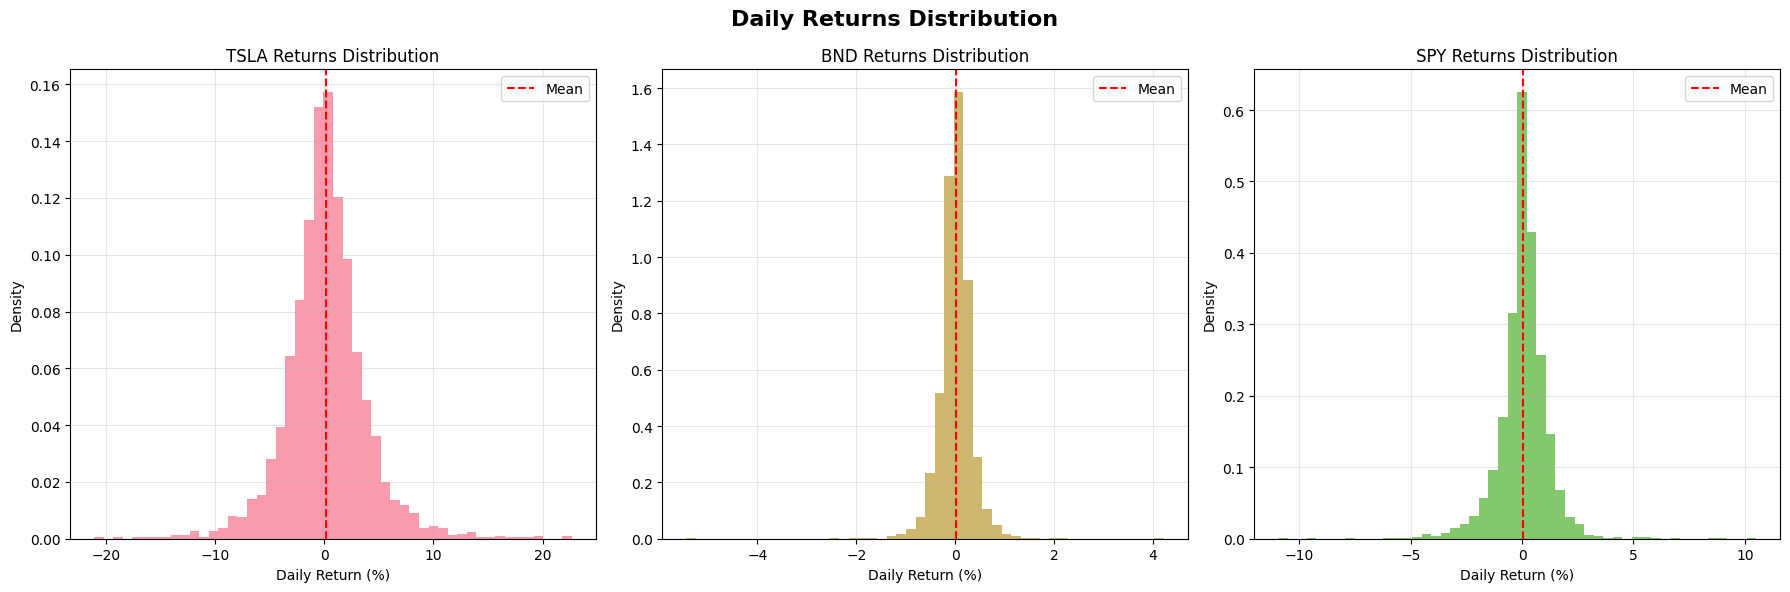

In [11]:

print("\n=== RETURN DISTRIBUTION ANALYSIS ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Daily Returns Distribution', fontsize=16, fontweight='bold')

for i, (ticker, data) in enumerate(assets.items()):
    returns = data['Daily_Return'].dropna()
    
    # Histogram
    axes[i].hist(returns * 100, bins=50, alpha=0.7, density=True, color=f'C{i}')
    axes[i].axvline(returns.mean() * 100, color='red', linestyle='--', label='Mean')
    axes[i].set_title(f'{ticker} Returns Distribution')
    axes[i].set_xlabel('Daily Return (%)')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
    # Normality test
    stat, p_value = stats.normaltest(returns.dropna())
    print(f"{ticker} Normality Test:")
    print(f"  Test Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Normal Distribution: {'No' if p_value < 0.05 else 'Yes'}")

plt.tight_layout()
plt.show()


The normality tests indicate that the daily returns of TSLA, BND, and SPY do not follow a normal distribution (p-values ≈ 0). 

# Step 7: Outlier Detection

Extreme price movements can indicate important events (earnings, news, market crashes) that might affect our forecasting models.

In [12]:
print("\n=== OUTLIER DETECTION ===")

for ticker, data in assets.items():
    returns = data['Daily_Return'].dropna()
    
    # Calculate outlier threshold (3 standard deviations)
    threshold = 3 * returns.std()
    outliers = returns[abs(returns) > threshold]
    
    print(f"{ticker} Outliers (>3σ):")
    print(f"  Total outliers: {len(outliers)}")
    print(f"  Threshold: ±{threshold*100:.2f}%")
    
    if len(outliers) > 0:
        print("  Top 5 extreme movements:")
        top_outliers = outliers.abs().nlargest(5)
        for date, return_val in top_outliers.items():
            direction = "↑" if outliers[date] > 0 else "↓"
            print(f"    {date.date()}: {direction} {abs(outliers[date])*100:.2f}%")
    print()


=== OUTLIER DETECTION ===
TSLA Outliers (>3σ):
  Total outliers: 43
  Threshold: ±11.19%
  Top 5 extreme movements:
    2025-04-09: ↑ 22.69%
    2024-10-24: ↑ 21.92%
    2020-09-08: ↓ 21.06%
    2020-02-03: ↑ 19.89%
    2021-03-09: ↑ 19.64%

BND Outliers (>3σ):
  Total outliers: 26
  Threshold: ±1.04%
  Top 5 extreme movements:
    2020-03-12: ↓ 5.44%
    2020-03-13: ↑ 4.22%
    2020-03-18: ↓ 2.41%
    2020-03-23: ↑ 2.21%
    2022-11-10: ↑ 2.07%

SPY Outliers (>3σ):
  Total outliers: 33
  Threshold: ±3.45%
  Top 5 extreme movements:
    2020-03-16: ↓ 10.94%
    2025-04-09: ↑ 10.50%
    2020-03-12: ↓ 9.57%
    2020-03-24: ↑ 9.06%
    2020-03-13: ↑ 8.55%



The outlier detection analysis identifies days with unusually large daily returns for each asset.

 TSLA exhibits the highest volatility with 43 outlier days, including a maximum gain of 22.69% and a maximum loss of -21.06%.
 
  BND is the least volatile, showing only 26 outlier days with a much smaller range of returns. 
  
  SPY lies in between, with 33 extreme days. Using a ±3σ threshold ensures that only statistically significant deviations from the mean are flagged, providing a clear picture of market extremes and potential risk periods.

# step8:correlation analysis


=== CORRELATION ANALYSIS ===


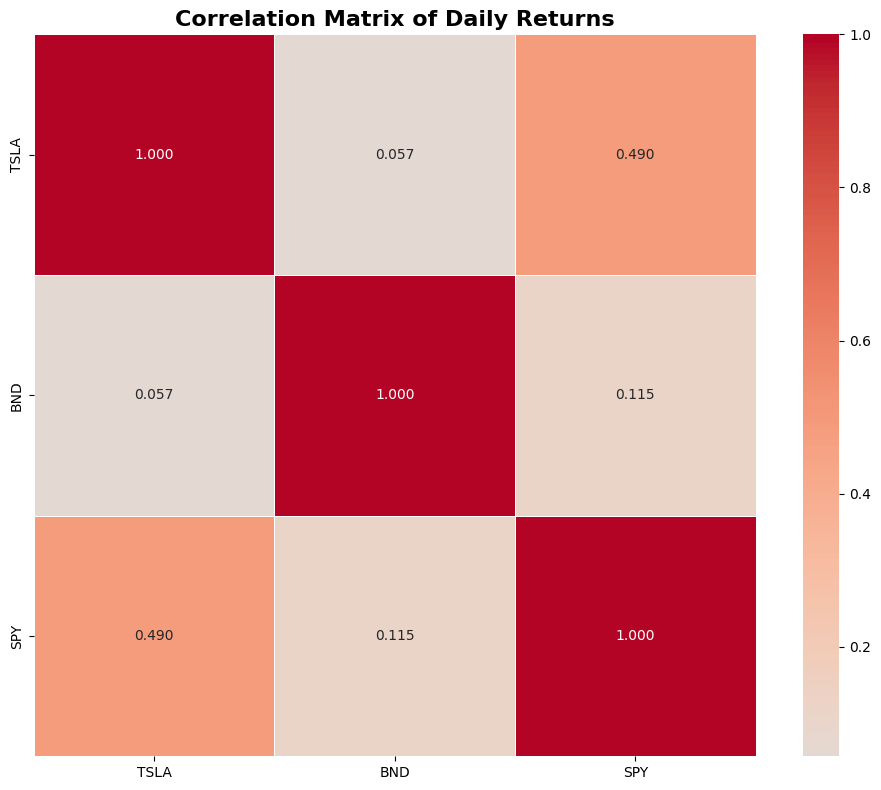

Correlation Matrix:
       TSLA    BND    SPY
TSLA  1.000  0.057  0.490
BND   0.057  1.000  0.115
SPY   0.490  0.115  1.000


In [13]:
print("\n=== CORRELATION ANALYSIS ===")

# Combine returns for correlation analysis
returns_df = pd.DataFrame({
    'TSLA': assets['TSLA']['Daily_Return'],
    'BND': assets['BND']['Daily_Return'],
    'SPY': assets['SPY']['Daily_Return']
}).dropna()

correlation_matrix = returns_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix of Daily Returns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

The correlation matrix highlights the linear relationships between the daily returns of the assets. 

TSLA and SPY show a moderate positive correlation (0.49), suggesting they often move in the same direction. 

BND exhibits very low correlation with both TSLA (0.057) and SPY (0.115), indicating it behaves largely independently, which aligns with its role as a low-volatility bond ETF. 

# Step 9: Stationarity Testing

Many forecasting models (like ARIMA) require stationary data - meaning the statistical properties don't change over time. This test tells us if we need to transform our data.

In [14]:
print("\n=== STATIONARITY ANALYSIS ===")

def adf_test(series, title):
    """Perform Augmented Dickey-Fuller test"""
    result = adfuller(series.dropna())
    
    print(f"{title}:")
    print(f"  ADF Statistic: {result[0]:.6f}")
    print(f"  P-value: {result[1]:.6f}")
    print(f"  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.6f}")
    
    if result[1] <= 0.05:
        print("  Result: Stationary (Reject H0)")
    else:
        print("  Result: Non-Stationary (Fail to reject H0)")
    print()

for ticker, data in assets.items():
    print(f"{ticker} Stationarity Tests:")
    
    # Test closing prices
    adf_test(data['Close'], f"{ticker} Closing Prices")
    
    # Test daily returns
    adf_test(data['Daily_Return'], f"{ticker} Daily Returns")

print("\nKey Insights:")
print("- Stock prices are typically non-stationary (trending)")
print("- Daily returns are usually stationary (good for modeling)")
print("- Non-stationary data may need differencing for ARIMA models")


=== STATIONARITY ANALYSIS ===
TSLA Stationarity Tests:
TSLA Closing Prices:
  ADF Statistic: -1.418872
  P-value: 0.573196
  Critical Values:
    1%: -3.432961
    5%: -2.862694
    10%: -2.567384
  Result: Non-Stationary (Fail to reject H0)

TSLA Daily Returns:
  ADF Statistic: -34.681090
  P-value: 0.000000
  Critical Values:
    1%: -3.432935
    5%: -2.862682
    10%: -2.567378
  Result: Stationary (Reject H0)

BND Stationarity Tests:
BND Closing Prices:
  ADF Statistic: -1.536251
  P-value: 0.515508
  Critical Values:
    1%: -3.432947
    5%: -2.862687
    10%: -2.567381
  Result: Non-Stationary (Fail to reject H0)

BND Daily Returns:
  ADF Statistic: -9.889783
  P-value: 0.000000
  Critical Values:
    1%: -3.432958
    5%: -2.862692
    10%: -2.567383
  Result: Stationary (Reject H0)

SPY Stationarity Tests:
SPY Closing Prices:
  ADF Statistic: 0.690812
  P-value: 0.989653
  Critical Values:
    1%: -3.432942
    5%: -2.862685
    10%: -2.567380
  Result: Non-Stationary (Fail 

In [29]:
print("=== RISK METRICS CALCULATION ===")
tickers = ['TSLA', 'BND', 'SPY']

# Download Close price and calculate daily returns
returns_data = {}
for ticker in tickers:
    df = yf.download(ticker, start='2015-07-01', end='2025-07-31')
    returns = df['Close'].pct_change().dropna()  # this is a Series
    returns_data[ticker] = returns

# Calculate risk metrics
risk_metrics = {}
for ticker, returns in returns_data.items():
    returns = returns.astype(float)  # ensure numeric scalar values
    # Value at Risk (95%)
    var_95 = np.percentile(returns, 5)
    
    # Sharpe Ratio (2% annual risk-free rate)
    risk_free_rate = 0.02 / 252
    excess_returns = returns - risk_free_rate
    sharpe_ratio = (excess_returns.mean() / returns.std()) * np.sqrt(252)
    
    # Maximum Drawdown
    cumulative = (1 + returns).cumprod()
    rolling_max = cumulative.cummax()
    drawdown = (cumulative - rolling_max) / rolling_max
    max_drawdown = drawdown.min()
    
    # Annual Volatility
    annual_vol = returns.std() * np.sqrt(252)
    
    risk_metrics[ticker] = {
        'var_95': float(var_95),
        'sharpe_ratio': float(sharpe_ratio),
        'max_drawdown': float(max_drawdown),
        'annual_volatility': float(annual_vol)
    }

# Print results
for ticker, metrics in risk_metrics.items():
    print(f"\n{ticker} Risk Metrics:")
    print(f"  VaR (95%): {metrics['var_95']:.2%}")
    print(f"  Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
    print(f"  Max Drawdown: {metrics['max_drawdown']:.2%}")
    print(f"  Annual Volatility: {metrics['annual_volatility']:.2%}")


=== RISK METRICS CALCULATION ===


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TSLA Risk Metrics:
  VaR (95%): -5.47%
  Sharpe Ratio: 0.74
  Max Drawdown: -73.63%
  Annual Volatility: 59.19%

BND Risk Metrics:
  VaR (95%): -0.49%
  Sharpe Ratio: -0.01
  Max Drawdown: -18.58%
  Annual Volatility: 5.49%

SPY Risk Metrics:
  VaR (95%): -1.72%
  Sharpe Ratio: 0.68
  Max Drawdown: -33.72%
  Annual Volatility: 18.24%


In [36]:
import pickle
# Save processed data 
print("=== SAVING PROCESSED DATA ===")
# Combine all existing results into one dictionary
processed_data = {
    'prices': data,                 #  downloaded price data
    'returns': returns_data,        #  already calculated daily returns
    'risk_metrics': risk_metrics,   #  already calculated VaR, Sharpe, etc.
    'stationarity_results': stationarity_results  
}

# Save everything to a pickle file
with open('processed_portfolio_data.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

print("✓ All existing processed data saved to 'processed_portfolio_data.pkl'")


=== SAVING PROCESSED DATA ===
✓ All existing processed data saved to 'processed_portfolio_data.pkl'
